In [1]:
from clustimage import Clustimage
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import re
import numpy as np

from scipy.ndimage import median_filter

# https://www.kaggle.com/datasets/olgabelitskaya/flower-color-images

In [2]:
images_folder= "./input/flower_images/" #PONER EL PATH DE CADA UNO
images_paths = sorted([images_folder + x for x in os.listdir(images_folder) if ".png" in x ])


# Loading labels from input/flower_images/flower_labels.csv
labels = pd.read_csv("./input/flower_images/flower_labels.csv", index_col=1)

# Loading flowers names from label_names.txt
names = pd.read_csv("label_names.txt", index_col=0)

label_names = labels.join(names).reset_index()

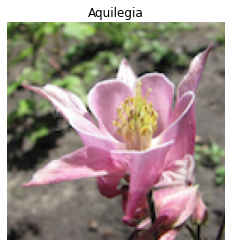

In [3]:
sample = np.random.choice(np.arange(0,len(images_paths)),1)[0]
sample_path = images_paths[sample]

img = cv2.imread(filename=sample_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
filename = sample_path.split("/")[-1]
flower_name = label_names.loc[label_names.file==filename,'name'].values[0]
plt.imshow(img)
plt.axis('off')
plt.title(flower_name.capitalize())
plt.show()

In [4]:
# defino funciones para graficos exploratorios

def miro_por_canales(img):
    fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
    for i in range(3):
        imagen = np.zeros_like(img)  # armo matriz con ceros
        imagen[:, :, i] = img[:, :, i]  # selecciono los canales de a uno
        axs[0, i].imshow(imagen)
        axs[0, i].set_title("RGB"[i])
        axs[0, i].axis('off')

    for i in range(3):
        imagen = np.zeros_like(img)  # armo matriz con ceros
        imagen[:, :, :] = 255        # paso a 255 todos los valores
        imagen[:, :, i] = img[:, :, i]  # selecciono los canales de a uno
        axs[1, i].imshow(imagen)
        axs[1, i].set_title("CMY"[i])
        axs[1, i].axis('off')

    plt.tight_layout()
    plt.show()
    plt.close(fig)


def separo_y_junto_canales(img):
    fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(15, 8))
    for i in range(3):
        imagen = np.zeros_like(img)  # paso a cero toos los valores
        imagen = img[:, :, i]   # selecciono los canales de a uno
        axs[i].imshow(imagen, cmap='gray')
        axs[i].set_title("RGB"[i])
        axs[i].axis('off')

    # http://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale
    suma_capas = (img[:, :, 0]*0.3 + img[:, :, 1]*0.59 + img[:, :, 2]*0.11)

    axs[3].imshow(suma_capas, cmap='gray')
    axs[3].set_title("Suma")
    axs[3].axis('off')

    axs[4].imshow(img)
    axs[4].set_title("Original")
    axs[4].axis('off')

    plt.tight_layout()
    plt.show()
    plt.close(fig)
    return None


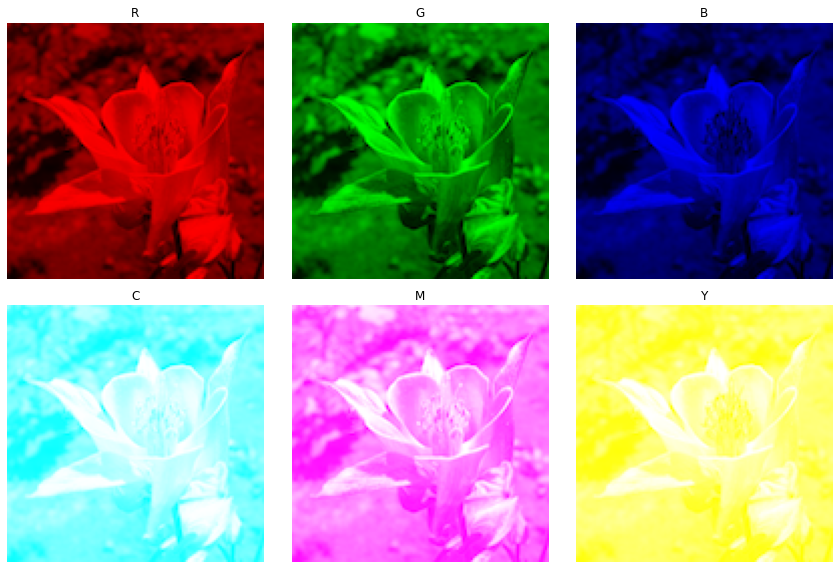

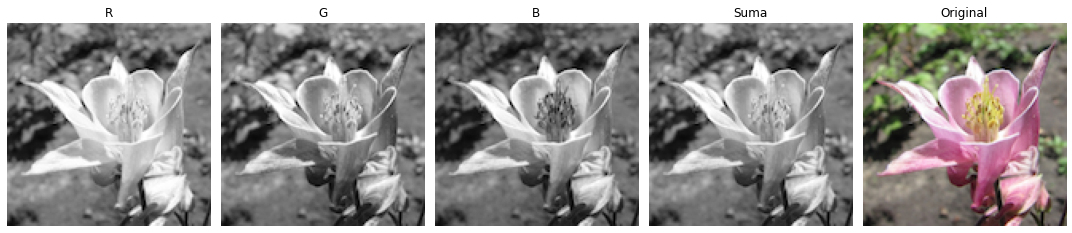

In [5]:
# %% corro funciones

miro_por_canales(img)
separo_y_junto_canales(img)

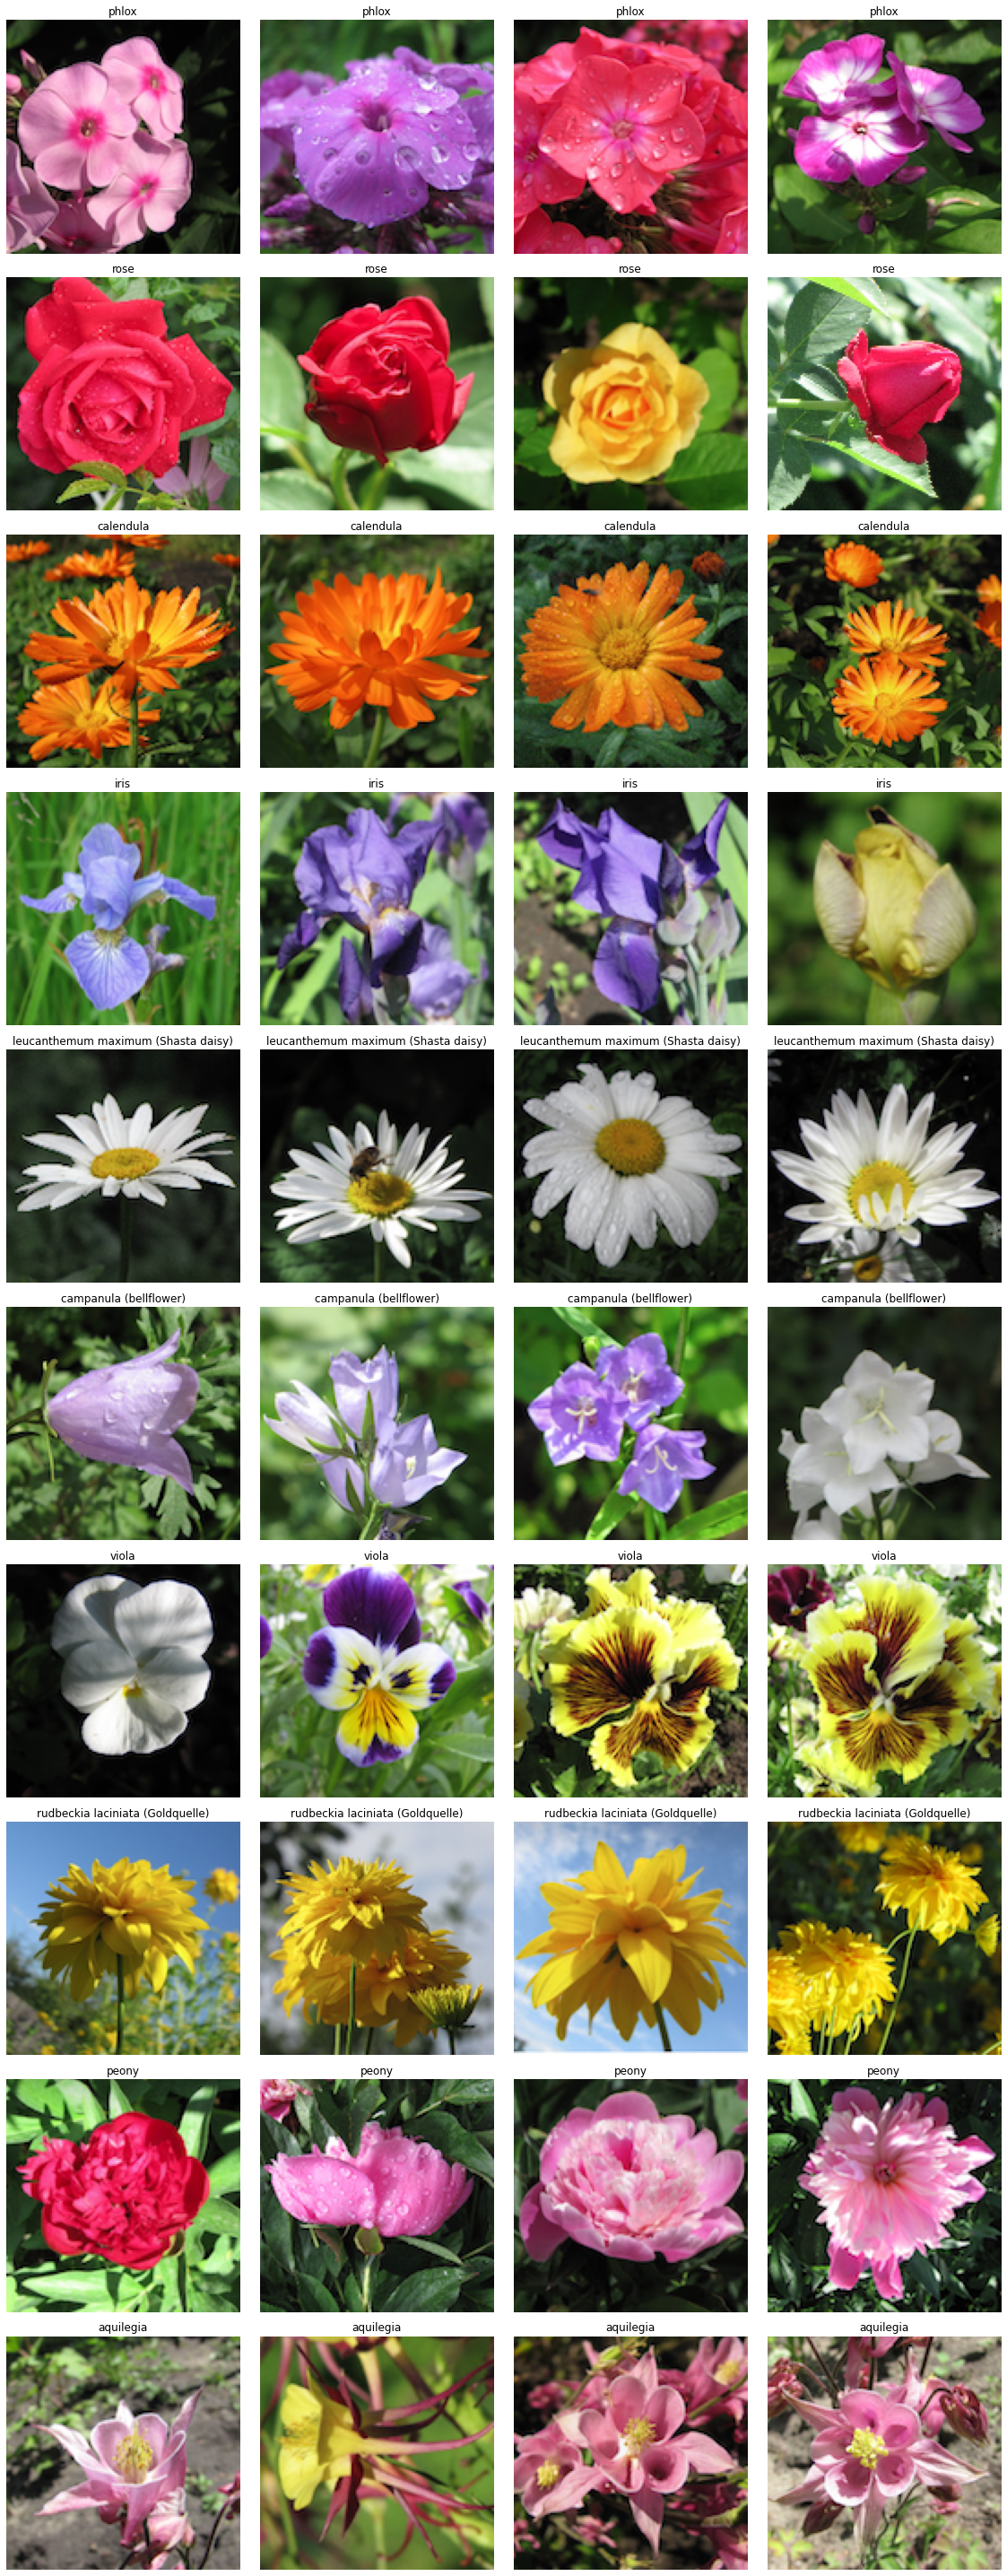

In [7]:
# %% miro por clase
# Explorar y graficar los subconjuntos de imágenes que representan flores de la misma especie.

def muestreo_categorías(label_names, muestra=4, images_folder=images_folder):
    N = label_names.name.nunique()
    M = muestra
    flowers_sample = (label_names.groupby('label')
                      .sample(n=M, replace=False)
                      .reset_index(drop=True)[['file', 'name']]
                      .set_index('file')
                      .to_records()
                      .reshape(N, M)
                      )

    fig, axs = plt.subplots(ncols=M, nrows=N, figsize=(M*4, N*4))
    for i in range(N):
        for j in range(M):
            x = flowers_sample[i, j]
            path = images_folder+x['file']
            name = x['name']
            img = cv2.imread(filename=path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axs[i, j].imshow(img)
            axs[i, j].set_title(name)
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()
    plt.close(fig)
    return None


muestreo_categorías(label_names, muestra=4, images_folder=images_folder)

La imagen se trata como un array. Puedo elegir qué parte mostrar

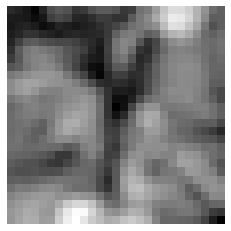

In [8]:
# defino "imagen" como suma de capas 
# http://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale
imagen = (img[:, :, 0]*0.3 + img[:, :, 1]*0.59 + img[:, :, 2]*0.11)


# Puedo seleccionar una región de la imagen
plt.imshow(imagen[3:30,3:30],cmap='gray')
plt.axis('off')
plt.show()

Como cualquier matriz, la imagen se puede rotar o girar

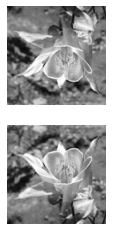

In [9]:
imagen_rotada = np.flipud(imagen) #Reverse the order of elements along axis 0 (up/down).
plt.subplot(2,1,1)
plt.imshow(imagen_rotada,cmap='gray')
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(imagen,cmap='gray')
plt.axis('off')
plt.show()

## Para suavizar una imagen o para reducir el ruido se usan filtros sobre las imágenes.

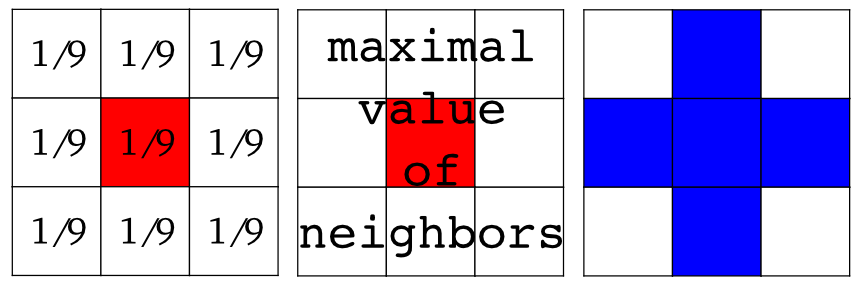


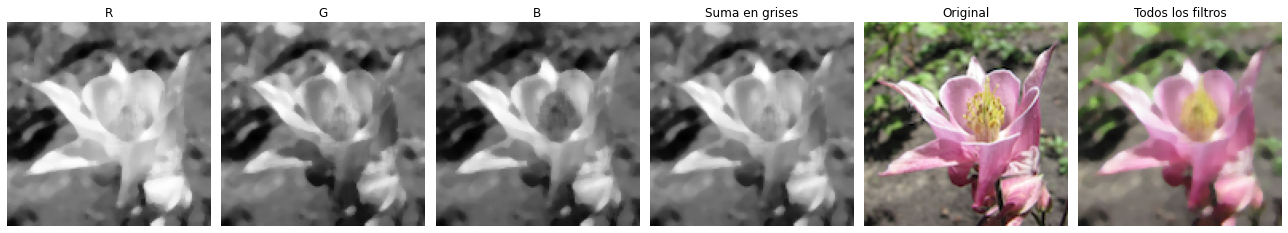

In [21]:
from scipy.ndimage import median_filter
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html

def separo_filtro_y_junto_canales(img, fuerza=2):
    fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(18, 8))
    imagen = np.zeros_like(img)  # paso a cero toos los valores
    for i in range(3):
        imagen[:, :, i] = median_filter(img[:, :, i], size=fuerza)   # selecciono los canales de a uno
        axs[i].imshow(imagen[:, :, i], cmap='gray')
        axs[i].set_title("RGB"[i])
        axs[i].axis('off')

    # http://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale
    suma_capas = (imagen[:, :, 0]*0.3 + imagen[:, :, 1]*0.59 + imagen[:, :, 2]*0.11)

    axs[3].imshow(suma_capas, cmap='gray')
    axs[3].set_title("Suma en grises")
    axs[3].axis('off')

    axs[4].imshow(img)
    axs[4].set_title("Original")
    axs[4].axis('off')

    axs[5].imshow(imagen)
    axs[5].set_title("Todos los filtros")
    axs[5].axis('off')



    plt.tight_layout()
    plt.show()
    plt.close(fig)
    return None

separo_filtro_y_junto_canales(img, fuerza=5)


In [129]:
# Cambiar la intensidad de una de las imágenes en escala de grises, transformarla en una imagen con mucho y otra con poco brillo.
# defino "imagen" como suma de capas 
# http://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale
imagen = (img[:, :, 0]*0.3 + img[:, :, 1]*0.59 + img[:, :, 2]*0.11)



IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

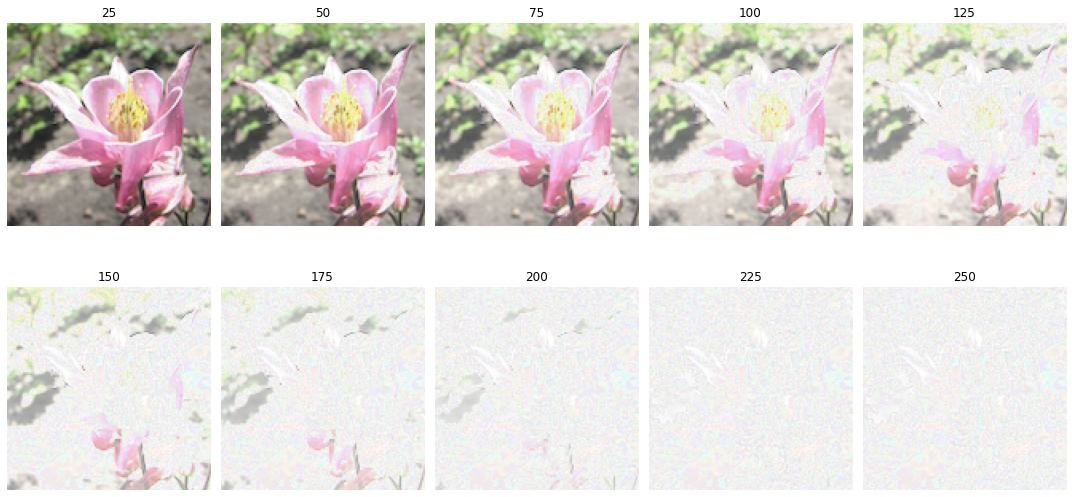

In [96]:
    
def gradiente_de_iluminacio_directo(imagen):
    imagen_luz = imagen.copy()
    fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(15, 8))
    
    subida = 0
    for i in range(0,10,1):
        subida = (i+1) * 25
        matriz_menos = imagen_luz < 229
        im_menos = np.zeros_like(imagen)  # armo matriz con ceros
        im_menos[matriz_menos] = 25  
        imagen_luz = imagen_luz + im_menos
    
        columna = (i-((i//5)*5))
        fila = i//5
        axs[fila, columna].imshow(imagen_luz)
        axs[fila, columna].set_title(subida)
        axs[fila, columna].axis('off')
    
    plt.tight_layout()
    plt.show()
    plt.close(fig)
    return None

gradiente_de_iluminacio_directo(img)



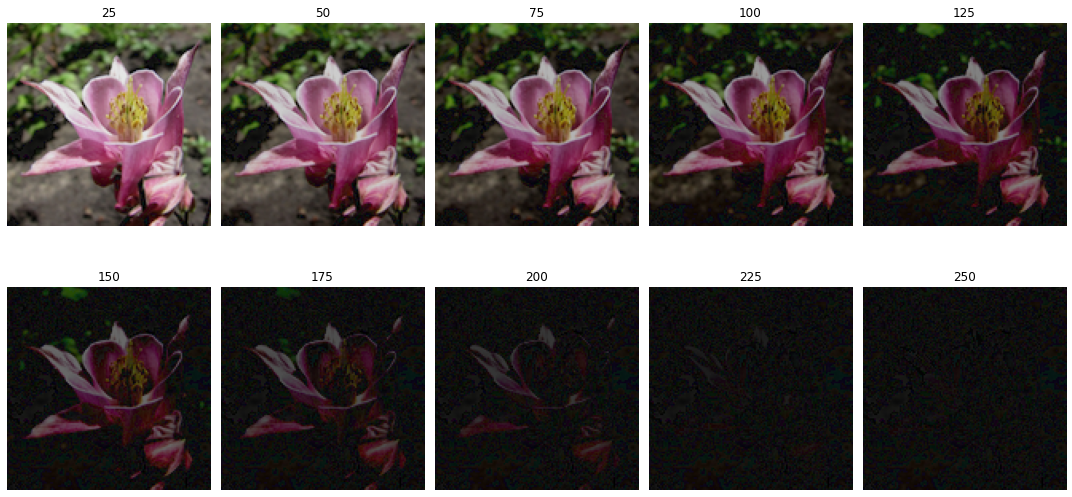

In [85]:
def gradiente_de_oscuridad_directo(imagen):
    imagen_dark = imagen.copy()
    fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(15, 8))
    
    subida = 0
    for i in range(0,10,1):
        subida = (i + 1) * 25
        matriz_menos = imagen_dark > 26
        im_menos = np.zeros_like(imagen)  # armo matriz con ceros
        im_menos[matriz_menos] = 25  
        imagen_dark = imagen_dark - im_menos
    
        columna = (i-((i//5)*5))
        fila = i//5
        axs[fila, columna].imshow(imagen_dark)
        axs[fila, columna].set_title(subida)
        axs[fila, columna].axis('off')
    
    plt.tight_layout()
    plt.show()
    plt.close(fig)
    return None

gradiente_de_oscuridad_directo(img)

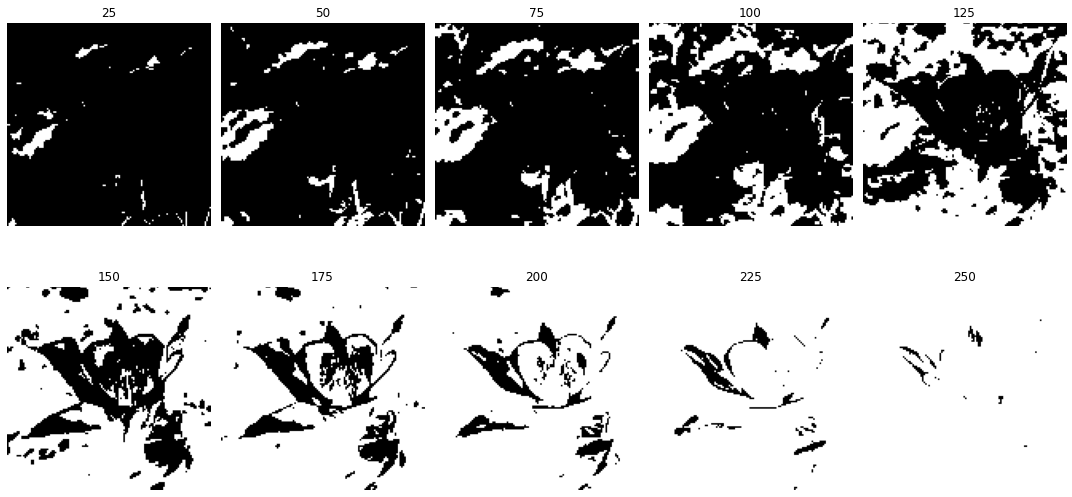

In [91]:
# Convertir una de las imágenes a blanco y negro (binario). ¿Es la única manera? 
# Si existen otras transformaciones mostrar más de una conversión.

def umbrales_byn(imagen):
    
    imagen_byn = imagen.copy()
    fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(15, 8))
    
    subida = 0
    for i in range(0,10,1):
        imagen_byn = imagen.copy()
        umbral = (i + 1) * 25
        matriz_menos = imagen_byn > umbral
        im_menos = np.zeros_like(imagen)  # armo matriz con ceros
        im_menos[:, :] = 255
        im_menos[matriz_menos] = 0  
        imagen_byn = im_menos
    
        columna = (i-((i//5)*5))
        fila = i//5
        axs[fila, columna].imshow(imagen_byn, cmap='gray')
        axs[fila, columna].set_title(umbral)
        axs[fila, columna].axis('off')
    
    plt.tight_layout()
    plt.show()
    plt.close(fig)
    return None

umbrales_byn(imagen)


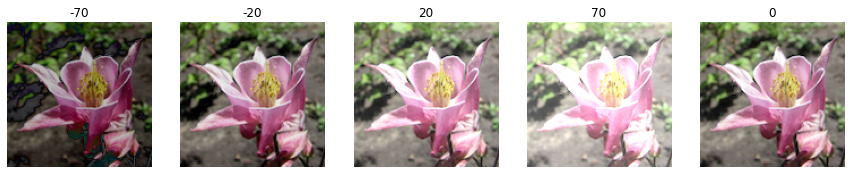

In [111]:
# copiando codigo de los docs de cv2

def variacion_brillo_cv2(img):
    fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(15, 7))
    image = img.copy()
    new_image = np.zeros(image.shape, image.dtype)
    
    
    for i, beta in enumerate([-70, -20, 20, 70]):
        new_image = cv2.convertScaleAbs(image, alpha=1, beta=beta)
        axs[i].imshow(new_image)
        axs[i].set_title(beta)
        axs[i].axis('off')
    axs[4].imshow(image)
    axs[4].set_title('0')
    axs[4].axis('off')
    
    return None

variacion_brillo_cv2(img)

(-0.5, 127.5, 127.5, -0.5)

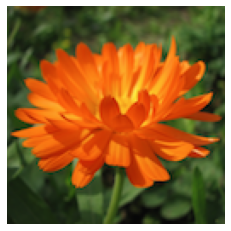

In [113]:
cl = Clustimage()
img = cl.imread(images_paths[2], dim=(128,128),colorscale=1)
len(img)
imagen_color=img.reshape(128,128,3)
imagen_gris = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY) #esto para otra conversion a gris
imagen_color = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)
plt.imshow(imagen_color)
plt.axis('off')

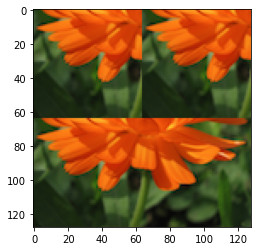

In [150]:
# %% superpongo lineas y las mezclo

def divido_y_mezclo(imagen_color, divisiones):
    if divisiones not in [1, 2, 4, 8, 16, 32, 64, 128]:
        print('Solo se aceptan como valores los divisores enteros de 128')
        print('1, 2, 4, 8, 16, 32, 64 o 128')
        return None
        
    imagen_color2 = imagen_color.copy()
    lista_partes=[]
    tamaño_parte = int(128/divisiones)
    for i in range(divisiones):
        for j in range(divisiones):
            x = i*tamaño_parte
            y = j*tamaño_parte
            lista_partes.append(imagen_color2[x:x+tamaño_parte, y:y+tamaño_parte, :])
    
    lista_partes = random.sample(lista_partes, divisiones*divisiones)
    
    for i in range(divisiones):
        for j in range(divisiones):
            x = i*tamaño_parte
            y = j*tamaño_parte
            imagen_color2[x:x+tamaño_parte, y:y+tamaño_parte, :] = lista_partes[j+i*divisiones]
    
    plt.imshow(imagen_color2)

divido_y_mezclo(imagen_color, 2)


In [139]:
def obtener_divisores(numero):

 

    divisores_positivos = []

    divisores_negativos = []

 

    if numero != 0:

 

        if numero < 0:

            numero2 = -numero

        else:

            numero2 = numero

 

        for divisor in range(1, numero2 + 1):

            if numero % divisor == 0:

                divisores_positivos.append(divisor)

 

        for divisor in range(-numero2-1, 0):

            if numero % divisor == 0:

                divisores_negativos.append(divisor)

 

    else:

        print("El numero 0 no tiene divisores")

 

    divisores_negativos.extend(divisores_positivos)

    return divisores_negativos

 

print("Introduzca el numero")

numero = int(input())

 

divisores = obtener_divisores(numero)

 

if len(divisores) > 1:

    print("El numero", numero, "tiene", len(divisores), "divisores, que son:", divisores)

elif len(divisores) == 1:

    print("El numero", numero, "tiene", len(divisores), "divisor, que es:", divisores)

else:

    print("El numero", numero, "no tiene divisores")

obtener_divisores(128)

Introduzca el numero


 128


El numero 128 tiene 16 divisores, que son: [-128, -64, -32, -16, -8, -4, -2, -1, 1, 2, 4, 8, 16, 32, 64, 128]


[-128, -64, -32, -16, -8, -4, -2, -1, 1, 2, 4, 8, 16, 32, 64, 128]

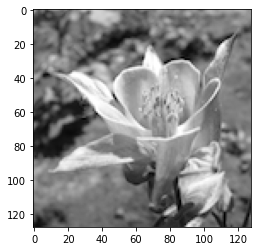

In [134]:
plt.imshow(imagen, cmap='gray')


In [133]:
imagen_color.shape

(128, 128, 3)

Text(0.5, 0, 'pixel values')

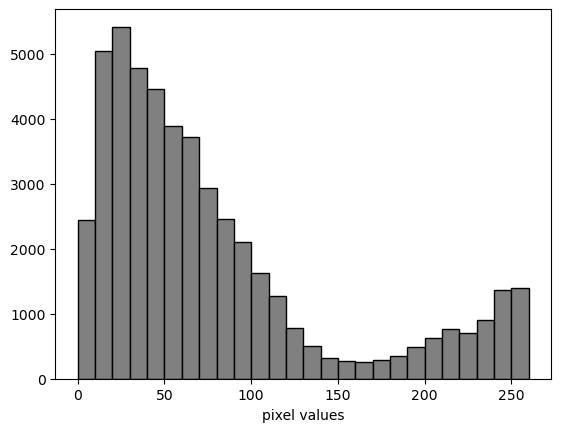

In [22]:
# Una forma de caracterizar la imagen es ver cómo es la distribución de los pixels
plt.hist(imagen_color.flatten(),bins=range(0, 255 + 10, 10),color='gray',edgecolor='k')
plt.xlabel('pixel values')

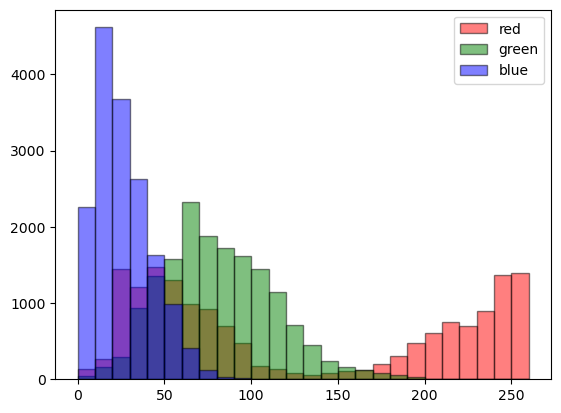

In [20]:
colores =['red','green','blue']
for n,cs in enumerate(colores):
  monocol=imagen_color[:,:,n]
  plt.hist(monocol.flatten(), color=cs,
             bins=range(0, 255 + 10, 10),
             edgecolor='k', alpha=0.5, label=cs,)
  plt.legend()

In [23]:
labels = pd.read_csv(images_folder+'flower_labels.csv')

In [25]:
df = pd.DataFrame()
for a in images_paths:
  img = cl.imread(a, dim=(128,128),colorscale=1)
  df = pd.concat([df, pd.DataFrame(img).T], ignore_index=True)
  # tmp = pd.concat([pd.DataFrame([a]), pd.DataFrame(img).T], axis=1)
  # df = pd.concat([df, tmp], ignore_index=True)


In [26]:
df

0      1      2      3      4      5      6      7      8      9      \
0       10     22     13      9     23     14     10     24     16     11   
1       30     49     38     30     50     37     30     52     38     31   
2       48     83     65     58     87     72     62     90     74     57   
3      105     54    167     94     68    152    100     82    161    110   
4       78     52    193     76     51    194     85     58    195    101   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
205     41    171     95     31    164     84     39    157     81     64   
206     12     14     13     11     14     12     11     14     12     10   
207      5      5      5      5      5      5      4      5      4      3   
208     51     82     69     52     83     71     44     77     66     37   
209     13     69     23     15     72     26     22     72     33     22   

     ...  49142  49143  49144  49145  49146  49147  49148  49149  49150  49151  
0    ...     70     38     38     59     16     25     26     78     74    117  
1    ...     10      8     10      9      7      7      7      5      5      5  
2    ...     50     38     70     52     41     74     56     42     76     58  
3    ...    111     69     45    108     70     44    106     70     44    106  
4    ...    252    200    179    253    189    163    248    154    120    229  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
205  ...     32     20     94     31     19     88     31     13     60     23  
206  ...     10     13     13     13     13     15     15     14     14     14  
207  ...      2      2      2      2      4      4      4      9      9      9  
208  ...    151    103    190    142     90    180    132     80    166    116  
209  ...     45     35    116     48     31    112     49     19    101     45  

[210 rows x 49152 columns]

In [ ]:
img = cl.imread(a, dim=(128,128),colorscale=1)
img.shape

(49152,)

In [ ]:
pd.DataFrame(path)

0
0    /content/drive/MyDrive/00_Docencia/0001_DMCT/2...
1    /content/drive/MyDrive/00_Docencia/0001_DMCT/2...
2    /content/drive/MyDrive/00_Docencia/0001_DMCT/2...
3    /content/drive/MyDrive/00_Docencia/0001_DMCT/2...
4    /content/drive/MyDrive/00_Docencia/0001_DMCT/2...
..                                                 ...
205  /content/drive/MyDrive/00_Docencia/0001_DMCT/2...
206  /content/drive/MyDrive/00_Docencia/0001_DMCT/2...
207  /content/drive/MyDrive/00_Docencia/0001_DMCT/2...
208  /content/drive/MyDrive/00_Docencia/0001_DMCT/2...
209  /content/drive/MyDrive/00_Docencia/0001_DMCT/2...

[210 rows x 1 columns]